# Data Management with Python - a glimpse

This notebook demonstrates how to use Python to perform the same data management operations as the one performed with OpenRefine in the following Data Carpentry workshop: https://datacarpentry.org/openrefine-socialsci/

In [80]:
import pandas as pd

# Loading data
data = pd.read_csv('https://ndownloader.figshare.com/files/11502815')

In [81]:
# Preview of data (by default the first 5 rows)

data.head()

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID
0,17-Nov-16,1,2017-03-23T09:49:57.000Z,2017-04-02T17:29:08.000Z,Manica,Manica,Bandula,God,11,no,...,['bicycle' ; 'television' ; 'solar_panel' ; ...,NaN,2,['Jan'],['na' ; 'rely_less_food' ; 'reduce_meals' ; ...,-19.112259,33.483456,698,14.0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef
1,17-Nov-16,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,...,['cow_cart' ; 'bicycle' ; 'radio' ; 'cow_pl...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.0,uuid:099de9c9-3e5e-427b-8452-26250e840d6e
2,17-Nov-16,3,2017-04-02T14:35:26.000Z,2017-04-02T17:26:53.000Z,Manica,Manica,Bandula,God,40,no,...,['solar_torch'],NaN,2,['Jan' ; 'Feb' ; 'Mar' ; 'Oct' ; 'Nov' ; ...,['na' ; 'restrict_adults' ; 'lab_ex_food'],-19.112108,33.483450,674,13.0,uuid:193d7daf-9582-409b-bf09-027dd36f9007
3,17-Nov-16,4,2017-04-02T14:55:18.000Z,2017-04-02T17:27:16.000Z,Manica,Manica,Bandula,God,6,no,...,['bicycle' ; 'radio' ; 'cow_plough' ; 'sola...,NaN,2,['Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112229,33.483424,679,5.0,uuid:148d1105-778a-4755-aa71-281eadd4a973
4,17-Nov-16,5,2017-04-02T15:10:35.000Z,2017-04-02T17:27:35.000Z,Manica,Manica,Bandula,God,18,no,...,['motorcyle' ; 'radio' ; 'cow_plough' ; 'mo...,NaN,2,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['na' ; 'go_forest' ; 'migrate'],-19.112217,33.483425,689,10.0,uuid:2c867811-9696-4966-9866-f35c3e97d02d


In [82]:
# Counts of unique values ("faceting" in Open Refine)

data['village'].value_counts() # Sorted by count by default

God                  43
Ruaca                43
Chirodzo             37
Ruaca-Nhamuenda       3
Ruca                  2
49                    1
Chirdozo              1
Ruaca - Nhamuenda     1
Name: village, dtype: int64

In [83]:
data['village'].value_counts(sort = False) # Sorted by name

Ruaca-Nhamuenda       3
Ruca                  2
Ruaca - Nhamuenda     1
Chirdozo              1
Chirodzo             37
49                    1
Ruaca                43
God                  43
Name: village, dtype: int64

In [84]:
# Correcting errors manually

ruaca_alias = ['Ruaca-Nhamuenda', 'Ruca', 'Ruaca - Nhamuenda', 'Ruaca']
chirodzo_alias = ['Chirodzo', 'Chirdozo']

data.loc[data['village'].isin(ruaca_alias), 'village'] = 'Ruaca'
data.loc[data['village'].isin(chirodzo_alias), 'village'] = 'Chirodzo'

data['village'].value_counts()

Ruaca       49
God         43
Chirodzo    38
49           1
Name: village, dtype: int64

In [85]:
# Convert to datetime

data['interview_date'] = data['interview_date'].astype('datetime64')

In [86]:
# Extracting date information

data['interview_month'] = pd.DatetimeIndex(data['interview_date']).month
data.loc[:, ['interview_date', 'interview_month']]

,interview_date,interview_month
0,2016-11-17,11
1,2016-11-17,11
2,2016-11-17,11
3,2016-11-17,11
4,2016-11-17,11
...,...,...
126,2017-05-18,5
127,2017-06-04,6
128,2017-06-04,6
129,2017-06-04,6


In [87]:
# Converting to list
punct_remove = ["[", "]", "'", " "]

for punct in punct_remove:
    data['items_owned'] = data['items_owned'].str.replace(punct, "")
   
data['items_owned'] = data['items_owned'].str.split(";")

data['items_owned']

0              [bicycle, television, solar_panel, table]
1      [cow_cart, bicycle, radio, cow_plough, solar_p...
2                                          [solar_torch]
3      [bicycle, radio, cow_plough, solar_panel, mobi...
4           [motorcyle, radio, cow_plough, mobile_phone]
                             ...                        
126                      [motorcyle, radio, solar_panel]
127    [car, lorry, television, radio, sterio, cow_pl...
128      [radio, solar_panel, solar_torch, mobile_phone]
129    [cow_cart, lorry, motorcyle, computer, televis...
130    [radio, cow_plough, solar_panel, solar_torch, ...
Name: items_owned, Length: 131, dtype: object

In [112]:
# Counting values
import itertools
from collections import Counter

items_owned = list(itertools.chain.from_iterable(data['items_owned'].dropna().values))
Counter(items_owned)

Counter({'bicycle': 60,
         'television': 31,
         'solar_panel': 65,
         'table': 45,
         'cow_cart': 30,
         'radio': 86,
         'cow_plough': 85,
         'solar_torch': 52,
         'mobile_phone': 86,
         'motorcyle': 39,
         'fridge': 5,
         'electricity': 6,
         'sofa_set': 9,
         'lorry': 5,
         'sterio': 12,
         'computer': 2,
         'car': 3})

In [115]:
# Counting values (using pandas)

data.explode(column = 'items_owned')['items_owned'].value_counts()

radio           86
mobile_phone    86
cow_plough      85
solar_panel     65
bicycle         60
solar_torch     52
table           45
motorcyle       39
television      31
cow_cart        30
sterio          12
sofa_set         9
electricity      6
fridge           5
lorry            5
car              3
computer         2
Name: items_owned, dtype: int64

In [125]:
# Filtering values - text match
data_mabat = data.loc[data['respondent_roof_type'].str.contains('mabat'), :]
                      
data_mabat.loc[:, ['instanceID', 'village', 'respondent_roof_type']].head(10)

,instanceID,village,respondent_roof_type
2,uuid:193d7daf-9582-409b-bf09-027dd36f9007,God,mabatisloping
3,uuid:148d1105-778a-4755-aa71-281eadd4a973,God,mabatisloping
7,uuid:d6cee930-7be1-4fd9-88c0-82a08f90fb5a,Chirodzo,mabatisloping
9,uuid:8f4e49bc-da81-4356-ae34-e0d794a23721,Chirodzo,mabatisloping
11,uuid:e6ee6269-b467-4e37-91fc-5e9eaf934557,God,mabatisloping
18,uuid:e32f2dc0-0d05-42fb-8e21-605757ddf07d,God,mabatisloping
20,uuid:6570a7d0-6a0b-452c-aa2e-922500e35749,God,mabatisloping
22,uuid:58b37b6d-d6cd-4414-8790-b9c68bca98de,Ruaca,mabatisloping
23,uuid:661457d3-7e61-45e8-a238-7415e7548f82,Ruaca,mabatisloping
24,uuid:45ed84c4-114e-4df0-9f5d-c800806c2bee,Ruaca,mabatisloping


In [126]:
# Filtering values - specific values
keep_rooftypes = ['mabatipiched', 'mabatisloping']

data_mabat2 = data.loc[data['respondent_roof_type'].isin(keep_rooftypes), :]
data_mabat2.loc[:, ['instanceID', 'village', 'respondent_roof_type']].head(10)

,instanceID,village,respondent_roof_type
2,uuid:193d7daf-9582-409b-bf09-027dd36f9007,God,mabatisloping
3,uuid:148d1105-778a-4755-aa71-281eadd4a973,God,mabatisloping
7,uuid:d6cee930-7be1-4fd9-88c0-82a08f90fb5a,Chirodzo,mabatisloping
9,uuid:8f4e49bc-da81-4356-ae34-e0d794a23721,Chirodzo,mabatisloping
11,uuid:e6ee6269-b467-4e37-91fc-5e9eaf934557,God,mabatisloping
18,uuid:e32f2dc0-0d05-42fb-8e21-605757ddf07d,God,mabatisloping
20,uuid:6570a7d0-6a0b-452c-aa2e-922500e35749,God,mabatisloping
22,uuid:58b37b6d-d6cd-4414-8790-b9c68bca98de,Ruaca,mabatisloping
23,uuid:661457d3-7e61-45e8-a238-7415e7548f82,Ruaca,mabatisloping
24,uuid:45ed84c4-114e-4df0-9f5d-c800806c2bee,Ruaca,mabatisloping


In [131]:
# Filtering values - specific values, inverted
data_mabat3 = data.loc[~data['respondent_roof_type'].isin(keep_rooftypes), :]
data_mabat3.loc[:, ['instanceID', 'village', 'respondent_roof_type']].head(10)

,instanceID,village,respondent_roof_type
0,uuid:ec241f2c-0609-46ed-b5e8-fe575f6cefef,God,grass
1,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,God,grass
4,uuid:2c867811-9696-4966-9866-f35c3e97d02d,God,grass
5,uuid:daa56c91-c8e3-44c3-a663-af6a49a2ca70,God,grass
6,uuid:ae20a58d-56f4-43d7-bafa-e7963d850844,God,grass
8,uuid:846103d2-b1db-4055-b502-9cd510bb7b37,Chirodzo,grass
10,uuid:d29b44e3-3348-4afc-aa4d-9eb34c89d483,God,grass
12,uuid:6c00c145-ee3b-409c-8c02-2c8d743b6918,God,grass
13,uuid:9b21467f-1116-4340-a3b1-1ab64f13c87d,God,grass
14,uuid:a837e545-ff86-4a1c-a1a5-6186804b985f,God,grass


In [135]:
# Sorting values

data.sort_values(by = ['gps_Altitude'])

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
110,2017-05-11,108,2017-05-11T05:42:08.000Z,2017-05-11T06:08:58.000Z,Manica,Manica,Bandula,God,22,no,...,NaN,3,['Aug' ; 'Sept' ; 'Oct' ; 'Nov'],['rely_less_food' ; 'limit_portion' ; 'reduc...,-19.111469,33.476105,0,20.000,uuid:e4f4d6ba-e698-45a5-947f-ba6da88cc22b,5
120,2017-06-03,167,2017-06-03T06:25:09.000Z,2017-06-03T06:45:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Jan' ; 'Nov' ; 'Dec'],['lab_ex_food'],-19.114989,33.488268,0,2000.000,uuid:a9d1a013-043b-475d-a71b-77ed80abe970,6
119,2017-06-03,166,2017-06-03T05:53:28.000Z,2017-06-03T06:25:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Feb' ; 'Mar'],['go_forest' ; 'lab_ex_food'],-19.113859,33.482665,0,1799.999,uuid:40aac732-94df-496c-97ba-5b67f59bcc7a,6
114,2017-05-18,143,2017-05-18T05:55:04.000Z,2017-05-18T06:37:10.000Z,Manica,Manica,Bandula,Ruaca,24,yes,...,NaN,3,['Jan' ; 'Dec'],['rely_less_food' ; 'limit_variety'],-19.112485,33.476332,0,1911.000,uuid:9a096a12-b335-468c-b3cc-1191180d62de,5
112,2017-05-11,117,2017-05-11T06:28:02.000Z,2017-05-11T06:55:35.000Z,Manica,Manica,Bandula,Ruaca,1,no,...,NaN,3,['Jan' ; 'Feb' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'reduc...,-19.111469,33.476105,0,20.000,uuid:3fe626b3-c794-48e1-a80f-5bfe440c507b,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2017-04-28,78,2017-04-28T07:09:39.000Z,2017-04-28T07:31:38.000Z,Manica,Manica,Bandula,Ruaca,20,no,...,NaN,2,['Aug' ; 'Sept' ; 'Oct'],['na'],-19.044026,33.403982,723,11.000,uuid:da3fa7cc-5ce9-44fd-9a78-b8982b607515,4
57,2016-11-16,58,2017-04-08T08:25:49.000Z,2017-04-08T08:48:51.000Z,Manica,Manica,Bandula,Chirodzo,35,yes,...,NaN,2,['none'],['na'],-19.112176,33.483321,723,11.000,uuid:a7a3451f-cd0d-4027-82d9-8dcd1234fcca,11
34,2016-11-17,35,2017-04-05T16:22:13.000Z,2017-04-05T16:50:25.000Z,Manica,Manica,Bandula,Chirodzo,45,yes,...,NaN,3,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['rely_less_food' ; 'limit_variety' ; 'limit...,-19.112114,33.483425,733,11.000,uuid:ff7496e7-984a-47d3-a8a1-13618b5683ce,11
101,2017-04-28,105,2017-04-28T15:32:38.000Z,2017-04-28T15:58:10.000Z,Manica,Manica,Bandula,Ruaca,20,yes,...,NaN,3,['Jan' ; 'Feb' ; 'Dec'],['lab_ex_food'],-19.112212,33.483505,735,11.000,uuid:af0904ee-4fdb-4090-973f-599c81ddf022,4


In [136]:
# Sorting values - multiple

data.sort_values(by = ['gps_Latitude', 'gps_Longitude'])

,interview_date,quest_no,start,end,province,district,ward,village,years_farm,agr_assoc,...,items_owned_other,no_meals,months_lack_food,no_food_mitigation,gps_Latitude,gps_Longitude,gps_Altitude,gps_Accuracy,instanceID,interview_month
120,2017-06-03,167,2017-06-03T06:25:09.000Z,2017-06-03T06:45:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Jan' ; 'Nov' ; 'Dec'],['lab_ex_food'],-19.114989,33.488268,0,2000.000,uuid:a9d1a013-043b-475d-a71b-77ed80abe970,6
119,2017-06-03,166,2017-06-03T05:53:28.000Z,2017-06-03T06:25:06.000Z,Manica,Manica,Bandula,Ruaca,16,no,...,NaN,2,['Feb' ; 'Mar'],['go_forest' ; 'lab_ex_food'],-19.113859,33.482665,0,1799.999,uuid:40aac732-94df-496c-97ba-5b67f59bcc7a,6
114,2017-05-18,143,2017-05-18T05:55:04.000Z,2017-05-18T06:37:10.000Z,Manica,Manica,Bandula,Ruaca,24,yes,...,NaN,3,['Jan' ; 'Dec'],['rely_less_food' ; 'limit_variety'],-19.112485,33.476332,0,1911.000,uuid:9a096a12-b335-468c-b3cc-1191180d62de,5
1,2016-11-17,1,2017-04-02T09:48:16.000Z,2017-04-02T17:26:19.000Z,Manica,Manica,Bandula,God,2,yes,...,NaN,2,['Jan' ; 'Sept' ; 'Oct' ; 'Nov' ; 'Dec'],['na' ; 'reduce_meals' ; 'restrict_adults' ;...,-19.112477,33.483416,690,19.000,uuid:099de9c9-3e5e-427b-8452-26250e840d6e,11
12,2016-11-21,13,2017-04-03T03:58:43.000Z,2017-04-03T04:19:36.000Z,Manica,Manica,Bandula,God,7,yes,...,NaN,2,['Sept' ; 'Oct' ; 'Nov'],['lab_ex_food'],-19.112369,33.483556,706,15.000,uuid:6c00c145-ee3b-409c-8c02-2c8d743b6918,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,2016-11-21,29,2017-04-05T05:37:30.000Z,2017-04-05T06:05:44.000Z,Manica,Manica,Bandula,Ruaca,10,yes,...,NaN,3,['Jan' ; 'Feb'],['rely_less_food' ; 'limit_variety'],-19.043024,33.405073,657,6.000,uuid:adcd7463-8943-4c67-b25f-f72311409476,11
30,2016-11-21,31,2017-04-05T06:21:20.000Z,2017-04-05T06:38:26.000Z,Manica,Manica,Bandula,Ruaca,15,yes,...,NaN,3,['none'],['na'],-19.043022,33.405094,704,4.000,uuid:cb06eb49-dd39-4150-8bbe-a599e074afe8,11
29,2016-11-21,30,2017-04-05T06:05:58.000Z,2017-04-05T06:20:39.000Z,Manica,Manica,Bandula,Ruaca,22,yes,...,NaN,2,['Jan' ; 'Feb'],['rely_less_food' ; 'limit_variety' ; 'limit...,-19.043005,33.405054,669,5.000,uuid:59341ead-92be-45a9-8545-6edf9f94fdc6,11
26,2016-11-21,27,2017-04-05T04:59:42.000Z,2017-04-05T05:14:45.000Z,Manica,Manica,Bandula,Ruaca,36,no,...,NaN,3,['none'],['na'],-19.043001,33.405084,679,14.000,uuid:3197cded-1fdc-4c0c-9b10-cfcc0bf49c4d,11


In [140]:
# Convert numerical to string (text)

data['years_farm'] = data['years_farm'].astype('string')

data['years_farm']

0      11
1       2
2      40
3       6
4      18
       ..
126     5
127    10
128     5
129    17
130    20
Name: years_farm, Length: 131, dtype: string

In [141]:
# Convert numerical to string (text)

data['years_farm'] = data['years_farm'].astype('float')

data['years_farm']

0      11.0
1       2.0
2      40.0
3       6.0
4      18.0
       ... 
126     5.0
127    10.0
128     5.0
129    17.0
130    20.0
Name: years_farm, Length: 131, dtype: float64

<AxesSubplot:ylabel='Frequency'>

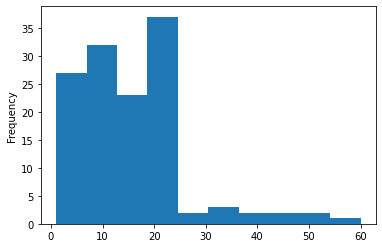

In [145]:
# Exploring numberical data
from matplotlib import pyplot as plt
% matplotlib inline

data['years_farm'].plot.hist()

In [148]:
# Save data

data.to_csv('../data/SAFI_edit.csv', index = False)